# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:

# Import libraries and dependencies
import numpy as np
import pandas as pd
import requests
import json
import os
import alpaca_trade_api as tradeapi
import datetime as dt
import pytz
from dotenv import load_dotenv
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_secret_key)

# Create the Alpaca REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

print(alpaca_api_key)
print(alpaca_secret_key)

PK62IO35QQ92OIHQCBMZ
9EawBSN7cIhIybivGTpRnwbiwSJaMyblwAmaXFwh


## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [4]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [5]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [6]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"

eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [7]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"

response = requests.get(btc_url).json()


# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable


# Display response data
print(json.dumps(response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19212775,
            "id": 1,
            "last_updated": 1668975297,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 319819101245,
                    "percent_change_1h": 0.0359392902931161,
                    "percent_change_24h": -0.281901320440373,
                    "percent_change_7d": -1.17776723304006,
                    "percentage_change_1h": 0.0359392902931161,
                    "percentage_change_24h": -0.281901320440373,
                    "percentage_change_7d": -1.17776723304006,
                    "price": 16600.15,
                    "volume_24h": 14017839192
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19212775,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocu

In [8]:
# Using the Python requests library, make an API call to access the current price ETH
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable


# Display response data
print(json.dumps(response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 120515341,
            "id": 1027,
            "last_updated": 1668975282,
            "max_supply": 120515341,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 143097653441,
                    "percent_change_1h": 0.480040335566067,
                    "percent_change_24h": -2.18481775323919,
                    "percent_change_7d": -5.67749668305341,
                    "percentage_change_1h": 0.480040335566067,
                    "percentage_change_24h": -2.18481775323919,
                    "percentage_change_7d": -5.67749668305341,
                    "price": 1184.31,
                    "volume_24h": 6159853465
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120515341,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cry

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [9]:
# Navigate the BTC response object to access the current price of BTC
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
response = requests.get(btc_url).json()
btc_price = response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f"the price for bitcoin is ${btc_price}")


the price for bitcoin is $16600.15


In [10]:
# Navigate the BTC response object to access the current price of ETH
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"
response = requests.get(eth_url).json()
eth_price = response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f"the price for ethereum is ${eth_price}")

the price for ethereum is $1184.31


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [11]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(f"my current value of my BTC holdings is ${btc_value}")


my current value of my BTC holdings is $19920.18


In [12]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(f"my current value of my ETH holding is ${eth_value}")


my current value of my ETH holding is $6276.843


In [13]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"the total value of my cryptocurrency wallet is ${total_crypto_wallet}")


the total value of my cryptocurrency wallet is $26197.023


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [14]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
#stock
spy_shares = 110
#bond
agg_shares = 200



#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [15]:
# Set Alpaca API key and secret key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_secret_key)

# Create the Alpaca REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [16]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["AGG", "SPY"]

# Set timeframe to 1Day
timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [17]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
share_close_prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

share_close_prices_df



,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-08-07 04:00:00+00:00,119.66,119.73,119.395,119.43,5559066,15246,119.475306,AGG
2020-08-07 04:00:00+00:00,333.28,334.88,332.300,334.57,57282821,350100,333.800372,SPY


In [18]:
share_close_prices_df.info

<bound method DataFrame.info of                              open    high      low   close    volume  \
timestamp                                                              
2020-08-07 04:00:00+00:00  119.66  119.73  119.395  119.43   5559066   
2020-08-07 04:00:00+00:00  333.28  334.88  332.300  334.57  57282821   

                           trade_count        vwap symbol  
timestamp                                                  
2020-08-07 04:00:00+00:00        15246  119.475306    AGG  
2020-08-07 04:00:00+00:00       350100  333.800372    SPY  >

In [19]:
# Reorganize the DataFrame
# Separate ticker data
SPY = share_close_prices_df[share_close_prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = share_close_prices_df[share_close_prices_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
close_prices_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Review the first 5 rows of the Alpaca DataFrame
display(close_prices_df.tail())



SPY                                   \
                             open    high    low   close    volume   
timestamp                                                            
2020-08-07 04:00:00+00:00  333.28  334.88  332.3  334.57  57282821   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2020-08-07 04:00:00+00:00      350100  333.800372  119.66  119.73  119.395   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-08-07 04:00:00+00:00  119.43  5559066       15246  119.475306

In [20]:
#creating an empy data fram for closing pices of SPY and AGG
closing_prices_df = pd.DataFrame()

# Populate the `closing_prices_df` DataFrame by accessing the `close` column
# from the `prices_df` DataFrame for both SPY and AGG
closing_prices_df["SPY"] = close_prices_df['SPY']['close']
closing_prices_df["AGG"] = close_prices_df['AGG']['close']

# Update the index for the `closing_prices_df` DataFrame
# to retain only the `date` component.
closing_prices_df.index = closing_prices_df.index.date

closing_prices_df


,SPY,AGG
2020-08-07,334.57,119.43


#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [21]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
AGG_price = float(closing_prices_df["AGG"])

AGG_price




119.43

In [22]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
SPY_price = float(closing_prices_df["SPY"])

SPY_price




334.57

In [23]:
# Compute daily returns
df_daily_returns = closing_prices_df.pct_change().dropna()
 

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [24]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * AGG_price

# Print the current value of the bond portfolio
print(f"the current AGG value of the bond portfolio is ${agg_value}")


the current AGG value of the bond portfolio is $23886.0


In [25]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * SPY_price

print(spy_value)

# Print the current value of the stock portfolio
print(f"the current SPY value of the bond portolfio is ${spy_value}")


36802.7
the current SPY value of the bond portolfio is $36802.7


In [26]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"the total value of the stock and bond portion of the portfolio is ${total_stocks_bonds}")


the total value of the stock and bond portion of the portfolio is $60688.7


In [27]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(f"the total value of the portfolio, including cryptocurrency, stocks and bonds is ${total_portfolio}")


the total value of the portfolio, including cryptocurrency, stocks and bonds is $86885.723


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [28]:
#import pandas as pd
# Consolidate financial assets data into a Python list
savings_data = ['crypto wallet', total_crypto_wallet], ['stock wallet', total_stocks_bonds]
    


# Review the Python list savings_data
savings_data
    


(['crypto wallet', 26197.023], ['stock wallet', 60688.7])

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [29]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame({"Value": [total_crypto_wallet, total_stocks_bonds]}, index=["crypto", "bonds"])

# Display the savings_df DataFrame
savings_df



,Value
crypto,26197.023
bonds,60688.700


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':"Member's Portfolio Pie Chart"}, ylabel='Value'>

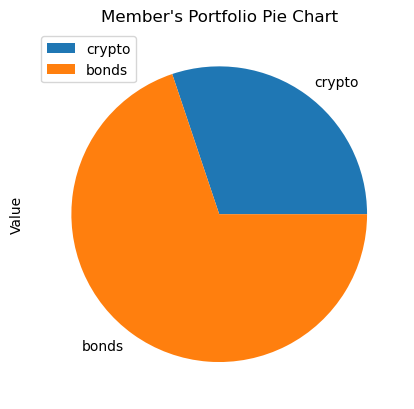

In [30]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y="Value", title="Member's Portfolio Pie Chart", )


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [31]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income
print(f"you're emergency fund value is ${emergency_fund_value}") 



you're emergency fund value is $36000


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [32]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print("congratulations, you have enough money in this fund")
    
elif total_portfolio == emergency_fund_value:
    print("congradulations on reaching this important financial goal")
else: 
    total_portfolio < emergency_fund_value
    print("sorry bitch")


congratulations, you have enough money in this fund


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [33]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp("2017-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

In [34]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
three_year_close_prices = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

three_year_close_prices

# Reorganize the DataFrame
# Separate ticker data
SPY = three_year_close_prices[three_year_close_prices['symbol']=='SPY'].drop('symbol', axis=1)
AGG = three_year_close_prices[three_year_close_prices['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
close_prices_three_year_concat = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display both the first and last five rows of the DataFrame
close_prices_three_year_concat


# Set the tickers for both the bond and stock portion of the portfolio
display(tickers)

# Set timeframe to 1Day
timeframe = "1Day"


['AGG', 'SPY']

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [35]:
from MCForecastTools import MCSimulation

# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# Configure a Monte Carlo simulation to forecast five years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = close_prices_three_year_concat,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
?MCSimulation


Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [36]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992233,1.006918,0.999450,1.005845,1.004864,0.996239,0.996982,0.990929,1.005652,1.003111,...,1.003182,1.000662,1.004662,1.003169,0.997091,1.001526,0.997139,0.996428,1.006014,0.993900
2,0.996277,1.007003,1.003563,1.004905,1.013371,0.996518,0.991482,0.992144,1.003504,0.997277,...,1.006641,1.003634,1.000746,0.997492,1.005563,0.999650,1.008354,0.997184,1.008326,0.991991
3,1.001421,1.003239,1.006380,1.008302,1.016684,0.992495,0.989104,0.991285,1.014490,1.000397,...,1.016660,1.001396,1.003764,0.999902,0.996671,0.995726,1.014771,1.001004,0.995551,1.006103
4,1.010642,1.003797,1.000360,1.004676,1.006868,0.992653,0.993803,0.978313,1.015840,0.997201,...,1.009383,1.002382,1.004682,1.016764,1.000043,0.977982,1.012846,0.998760,0.999818,0.998180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.159469,12.403812,8.642222,12.056505,13.680854,4.605030,7.441850,8.516605,12.786566,8.571470,...,17.467852,3.813592,11.647126,10.559454,8.684082,10.273956,5.731369,5.653105,5.666508,12.578776
7557,8.235001,12.373459,8.575598,12.070122,13.685457,4.572690,7.387192,8.468382,12.860874,8.552256,...,17.393786,3.787116,11.574499,10.634380,8.662827,10.358562,5.704791,5.657257,5.709285,12.621284
7558,8.246247,12.299307,8.597416,12.030847,13.681729,4.553508,7.472620,8.567256,12.815359,8.585340,...,17.494777,3.802481,11.593400,10.652916,8.714539,10.314877,5.691788,5.644472,5.721674,12.646300
7559,8.220552,12.125140,8.629106,12.067687,13.683046,4.552229,7.429263,8.560459,12.737741,8.703376,...,17.658944,3.779286,11.595114,10.647871,8.823706,10.375407,5.675638,5.621682,5.762556,12.528776


In [37]:
# Visualize the 30-year Monte Carlo simulation by creating an
# Plot probability distribution and confidence interval

MC_sim_thirtyyear_line_plot = MC_thirtyyear.plot_simulation

MC_sim_thirtyyear_line_plot





<bound method MCSimulation.plot_simulation of <MCForecastTools.MCSimulation object at 0x000001FD42F7D790>>

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

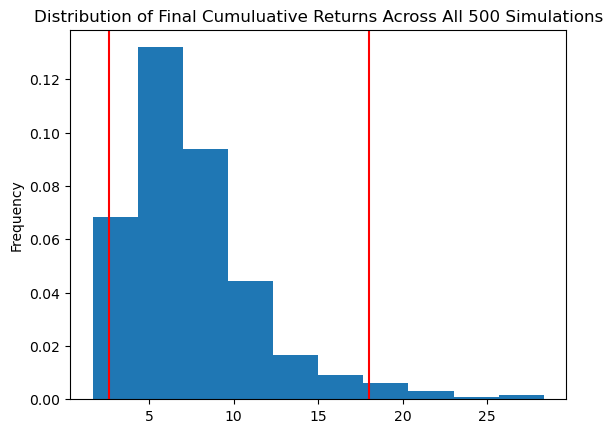

In [38]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_thirtyyear_dist_plot = MC_thirtyyear.plot_distribution()

MC_sim_thirtyyear_dist_plot


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [39]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = MC_thirtyyear.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(MC_summary_statistics)






count           500.000000
mean              7.489749
std               3.913668
min               1.665185
25%               4.857585
50%               6.536007
75%               8.946953
max              28.338321
95% CI Lower      2.604795
95% CI Upper     18.004254
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [54]:
# Print the current balance of the stock and bond portion of the members portfolio
three_year_close_prices


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-08-07 04:00:00+00:00,109.6900,109.72,109.6066,109.685,2359826,7755,109.674876,AGG
2017-08-08 04:00:00+00:00,109.6700,109.69,109.5000,109.580,2570876,12663,109.577636,AGG
2017-08-09 04:00:00+00:00,109.8700,109.87,109.6600,109.670,2308932,11031,109.771749,AGG
2017-08-10 04:00:00+00:00,109.7000,109.85,109.6700,109.800,2004163,12437,109.776611,AGG
2017-08-11 04:00:00+00:00,109.7500,109.94,109.6800,109.870,1913253,10113,109.860974,AGG
...,...,...,...,...,...,...,...,...
2020-08-03 04:00:00+00:00,328.3200,329.62,327.7300,328.670,53078112,288003,328.658795,SPY
2020-08-04 04:00:00+00:00,327.8600,330.06,327.8600,330.000,41917896,250899,329.057592,SPY
2020-08-05 04:00:00+00:00,331.4700,332.39,331.1800,332.030,42870955,241416,331.791643,SPY


In [44]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_summary_statistics[8] * 10000
ci_upper_thirty_cumulative_return = MC_summary_statistics[9] * 10000

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
    f" over the next 5 years will end within in the range of"
    f" ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}.")




There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $ 24367.94 and $ 187728.61.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [55]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_tenyear = MCSimulation(
    portfolio_data = close_prices_three_year_concat,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data
?MCSimulation


Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [56]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005232,1.001879,1.001601,0.993603,1.000831,1.000141,0.999803,1.001609,0.999677,0.993226,...,1.004549,1.000136,1.003655,1.000989,1.002046,1.002582,1.002244,0.997762,0.998171,0.996799
2,0.997258,1.004190,1.000874,0.996271,1.006496,0.997002,1.000672,0.999106,1.002549,0.992755,...,1.002952,1.002299,1.002696,1.003131,1.006611,1.003815,0.994309,0.999979,1.002506,0.993849
3,0.995955,1.010346,1.000005,0.995901,1.004671,1.004934,1.000021,0.998098,1.008329,0.991882,...,1.007192,1.000648,1.006864,1.003241,1.005972,0.993056,0.997110,1.001416,1.002171,0.996658
4,0.991590,1.011285,0.999174,0.989673,0.998049,1.007154,0.995338,0.995457,1.006548,0.988602,...,1.009145,1.000000,1.004378,0.997239,1.001118,0.991090,0.996761,1.000475,1.008289,1.003328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.398154,1.238912,1.169379,1.672399,1.941412,1.733419,2.044337,1.319552,1.507708,1.754577,...,1.793345,1.284810,1.767129,1.328197,1.461153,1.571508,2.095252,1.476427,1.765426,1.840792
2517,1.396773,1.241421,1.176837,1.680038,1.941288,1.729814,2.024915,1.322618,1.502777,1.756504,...,1.794902,1.282915,1.761740,1.323353,1.462779,1.573642,2.104504,1.472924,1.775575,1.846412
2518,1.397898,1.235940,1.180128,1.661942,1.951035,1.732662,2.018702,1.321178,1.505547,1.749920,...,1.791642,1.287553,1.756780,1.324979,1.462515,1.576508,2.111436,1.466290,1.779947,1.840812
2519,1.398674,1.233331,1.195584,1.664972,1.944443,1.729648,2.021550,1.319666,1.501984,1.761945,...,1.797648,1.286518,1.752178,1.324629,1.462217,1.575422,2.108503,1.469870,1.791542,1.846371


In [57]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot

MC_sim_tenyear_line_plot = MC_tenyear.plot_simulation

MC_sim_tenyear_line_plot


<bound method MCSimulation.plot_simulation of <MCForecastTools.MCSimulation object at 0x0000019885F222E0>>

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

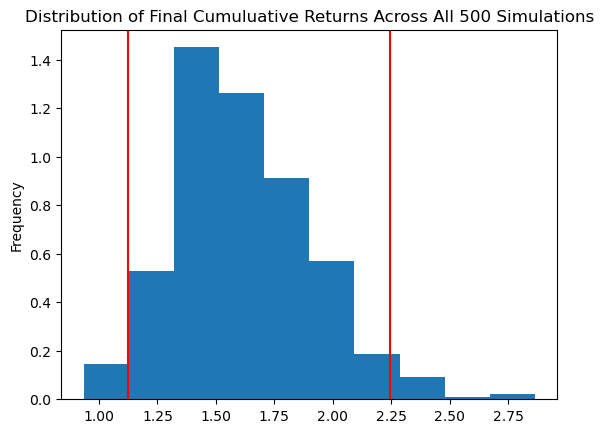

In [58]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_tenyear_dist_plot = MC_tenyear.plot_distribution()

MC_sim_tenyear_dist_plot



In [59]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics_tenyear = MC_tenyear.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_summary_statistics_tenyear)




count           500.000000
mean              1.619448
std               0.291209
min               0.935580
25%               1.407629
50%               1.594642
75%               1.796403
max               2.864590
95% CI Lower      1.125335
95% CI Upper      2.244661
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [62]:
# Print the current balance of the stock and bond portion of the members portfolio



In [63]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_summary_statistics_tenyear[8] * 10000
ci_upper_ten_cumulative_return = MC_summary_statistics_tenyear[9] * 10000

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
    f" over the next 5 years will end within in the range of"
    f" ${ci_lower_ten_cumulative_return: .2f} and ${ci_upper_ten_cumulative_return: .2f}.")







There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $ 11253.35 and $ 22446.61.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?